In [ ]:
#REFERENCES:
#https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

In [21]:
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.pyplot as plt
import numpy as np

In [31]:
ext = '.bmp'
data_path = '/Users/dnyanadajoshi/Dropbox/data/0624/NG/'
original_name = 'NG_2'+ext
marked_name = 'NG_2_checkmark'+ext
file_original = original_name[:-len(ext)] + "_cropped"+ext
file_marked = marked_name[:-len(ext)] + "_cropped"+ext

In [32]:
image = cv2.imread(data_path+original_name)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [33]:
image = cv2.medianBlur(image, 21)
modified_image = cv2.resize(image, (300, 200), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [37]:
number_of_colors = 5
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [41]:
def RGB2HSV(values):
    color = np.uint8([[[values[0], values[1], values[2]]]])
    flag = cv2.COLOR_BGR2HSV_FULL
    hsv_color = cv2.cvtColor(color, flag)
    hue = hsv_color[0][0][0]
    return hsv_color[0][0][0]
    #return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

ValueError: RGBA values should be within 0-1 range

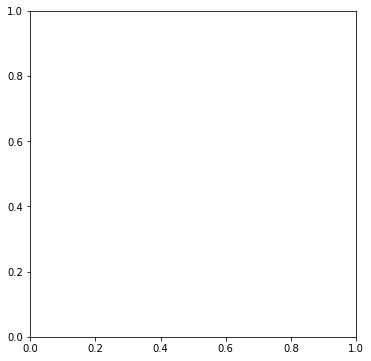

In [43]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HSV(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)